# Comparative Analysis of Heart Disease Risk Factors from Two Independent Datasets

## Project Overview
This project aims to analyze and compare two independent datasets related to heart disease, with the goal of identifying key risk factors and evaluating predictive models. The analysis includes data preprocessing, exploratory data analysis (EDA), statistical hypothesis testing, and machine learning modeling for both datasets, followed by a comparative evaluation of the results.

**Dataset source & license:**
- **Dataset 1:** Source: [Kaggle - link](https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset), License: ["Not specified"]
- **Dataset 2:** Source: [Kaggle - link](https://www.kaggle.com/datasets/rashadrmammadov/heart-disease-prediction), License: ["Not specified"]


#### Both datasets are independent, meaning they have been collected separately, contain different features, and do not share any identical records.

## Datasets Description

- **Dataset 1:** Contains **1,319 records** with **9 features**, including demographic data (`age`, `gender`), lifestyle/physical measurements (`impluse`, `pressurehight`, `pressurelow`, `glucose`, `kcm`, `troponin`), and the target variable `class` indicating the presence of heart disease.

- **Dataset 2:** Contains **1,000 records** with **16 features**, covering demographic data, lifestyle habits, and medical measurements (`Age`, `Gender`, `Cholesterol`, `Blood Pressure`, `Heart Rate`, `Smoking`, `Alcohol Intake`, `Exercise Hours`, `Family History`, `Diabetes`, `Obesity`, `Stress Level`, `Blood Sugar`, `Exercise Induced Angina`, `Chest Pain Type`), along with the target variable `Heart Disease`.



In [560]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro

from src.overview_functions import convert_to_string_to_lower

In [561]:
dataset1 = pd.read_csv('../data/dataset_1.csv')
dataset2 = pd.read_csv('../data/dataset_2.csv')

In [562]:
dataset1

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [563]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [564]:
#Check the dimension of the dataset (rows, columns)
dataset1.shape

(1319, 9)

In [565]:
# Check the data types of all columns in the dataset
dataset1.dtypes

age                int64
gender             int64
impluse            int64
pressurehight      int64
pressurelow        int64
glucose          float64
kcm              float64
troponin         float64
class             object
dtype: object

In [566]:
# Check for missing values in each column
dataset1.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [567]:
# Count the number of unique values in each column
dataset1.nunique()

age               75
gender             2
impluse           79
pressurehight    116
pressurelow       73
glucose          244
kcm              700
troponin         352
class              2
dtype: int64

In [568]:
#Update the column name
dataset1.rename(columns={'impluse': 'pulse'}, inplace=True)
dataset1.rename(columns={'pressurehight': 'pressure_high'}, inplace=True)
dataset1.rename(columns={'pressurelow': 'pressure_low'}, inplace=True)

In [569]:
# Count the number of duplicate rows in the dataset
dataset1.duplicated().sum()

np.int64(0)

In [570]:
# Generate descriptive statistics for all numerical columns
dataset1.describe()

,age,gender,pulse,pressure_high,pressure_low,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [571]:
# Display the first 5 rows of the dataset
dataset1.head()

,age,gender,pulse,pressure_high,pressure_low,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [572]:
# Convert the values in the 'class' column: 0 for 'negative' and 1 for 'positive'
dataset1['class'] = dataset1['class'].map({
    'negative': 0,
    'positive': 1
})

In [573]:
dataset1

,age,gender,pulse,pressure_high,pressure_low,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


**Target variable encoding: dataset1['class']**
- `0` → Negative (No heart disease)
- `1` → Positive (Heart disease present)

In [574]:
# Mini data dictionary
data_dict1 = pd.DataFrame({
    'Column': dataset1.columns,
    'Type': dataset1.dtypes.astype(str),
    'Unique Values': dataset1.nunique(),
    'Missing %': (dataset1.isna().mean() * 100).round(2)
})
data_dict1

,Column,Type,Unique Values,Missing %
age,age,int64,75,0.0
gender,gender,int64,2,0.0
pulse,pulse,int64,79,0.0
pressure_high,pressure_high,int64,116,0.0
pressure_low,pressure_low,int64,73,0.0
glucose,glucose,float64,244,0.0
kcm,kcm,float64,700,0.0
troponin,troponin,float64,352,0.0
class,class,int64,2,0.0


In [575]:
dataset2

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
996,78,Female,334,145,76,Never,NaN,6,No,No,No,10,196,Yes,Typical Angina,1
997,79,Male,151,179,81,Never,Moderate,4,Yes,No,Yes,8,189,Yes,Asymptomatic,0
998,60,Female,326,151,68,Former,NaN,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1


In [576]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [577]:
dataset2.shape

(1000, 16)

In [578]:
dataset2.isnull().any()

Age                        False
Gender                     False
Cholesterol                False
Blood Pressure             False
Heart Rate                 False
Smoking                    False
Alcohol Intake              True
Exercise Hours             False
Family History             False
Diabetes                   False
Obesity                    False
Stress Level               False
Blood Sugar                False
Exercise Induced Angina    False
Chest Pain Type            False
Heart Disease              False
dtype: bool

In [579]:
# Convert all column names to lowercase and replace spaces with underscores for consistency
dataset2.columns = dataset2.columns.str.lower().str.replace(' ', '_')

In [580]:
# Convert 'gender' column values to lowercase strings for consistency
dataset2['gender'] = convert_to_string_to_lower(dataset2, 'gender')

# Map gender categories to numeric values: 0 for female, 1 for male
dataset2['gender'] = dataset2['gender'].map({
    'female': 0,
    'male': 1
})

In [581]:
# Convert 'gender' column values to lowercase strings for consistency
dataset2['smoking'] = convert_to_string_to_lower(dataset2, 'smoking')

# Map smoking status to numeric values: 
# 0 for never smoked, 1 for currently smoking, 2 for former smoker
dataset2['smoking'] = dataset2['smoking'].map({
    'never': 0,
    'current': 1,
    'former': 2
})

In [582]:
# Convert 'gender' column values to lowercase strings for consistency
dataset2['alcohol_intake'] = convert_to_string_to_lower(dataset2, 'alcohol_intake')

# Map alcohol intake levels to numeric values:
# 1 for moderate, 2 for heavy, and replace NaN with 0 (no alcohol intake)
dataset2['alcohol_intake'] = dataset2['alcohol_intake'].map({
    'moderate': 1,
    'heavy': 2
}).fillna(0)

# Convert the 'alcohol_intake' column to integer type
dataset2['alcohol_intake'] = dataset2['alcohol_intake'].astype(int)

In [583]:
# Convert 'family_history' column values to lowercase strings for consistency
dataset2['family_history'] = convert_to_string_to_lower(dataset2, 'family_history')

# Map family history of heart disease to numeric values:
# 0 for no, 1 for yes
dataset2['family_history'] = dataset2['family_history'].map({
    'no': 0,
    'yes': 1,
})

In [584]:
# Convert 'diabetes' column values to lowercase strings for consistency
dataset2['diabetes'] = convert_to_string_to_lower(dataset2, 'diabetes')

# Map diabetes status to numeric values:
# 0 for no, 1 for yes
dataset2['diabetes'] = dataset2['diabetes'].map({
    'no': 0,
    'yes': 1,
})

In [585]:
# Convert 'obesity' column values to lowercase strings for consistency
dataset2['obesity'] = convert_to_string_to_lower(dataset2, 'obesity')

# Map obesity status to numeric values:
# 0 for no, 1 for yes
dataset2['obesity'] = dataset2['obesity'].map({
    'no': 0,
    'yes': 1,
})

In [586]:
# Convert 'exercise_induced_angina' column values to lowercase strings for consistency
dataset2['exercise_induced_angina'] = convert_to_string_to_lower(dataset2, 'exercise_induced_angina')

# Map exercise-induced angina status to numeric values:
# 0 for no, 1 for yes
dataset2['exercise_induced_angina'] = dataset2['exercise_induced_angina'].map({
    'no': 0,
    'yes': 1,
})

In [587]:
# Convert 'chest_pain_type' column values to lowercase strings for consistency
dataset2['chest_pain_type'] = convert_to_string_to_lower(dataset2, 'chest_pain_type')

In [588]:
# Count the number of unique values in each column, including NaN values
dataset2.nunique(dropna=False)

age                         55
gender                       2
cholesterol                200
blood_pressure              90
heart_rate                  40
smoking                      3
alcohol_intake               3
exercise_hours              10
family_history               2
diabetes                     2
obesity                      2
stress_level                10
blood_sugar                130
exercise_induced_angina      2
chest_pain_type              4
heart_disease                2
dtype: int64

In [589]:
# Display the data type of each column in the dataset
dataset2.dtypes

age                                 int64
gender                              int64
cholesterol                         int64
blood_pressure                      int64
heart_rate                          int64
smoking                             int64
alcohol_intake                      int64
exercise_hours                      int64
family_history                      int64
diabetes                            int64
obesity                             int64
stress_level                        int64
blood_sugar                         int64
exercise_induced_angina             int64
chest_pain_type            string[python]
heart_disease                       int64
dtype: object

In [590]:
# Display the entire dataset2 DataFrame
dataset2

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,0,228,119,66,1,2,1,0,0,1,8,119,1,atypical angina,1
1,48,1,204,165,62,1,0,5,0,0,0,9,70,1,typical angina,0
2,53,1,234,91,67,0,2,3,1,0,1,5,196,1,atypical angina,1
3,69,0,192,90,72,1,0,4,0,1,0,7,107,1,non-anginal pain,0
4,62,0,172,163,93,0,0,6,0,1,0,2,183,1,asymptomatic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,0,269,111,86,0,2,5,0,1,1,10,120,0,non-anginal pain,1
996,78,0,334,145,76,0,0,6,0,0,0,10,196,1,typical angina,1
997,79,1,151,179,81,0,1,4,1,0,1,8,189,1,asymptomatic,0
998,60,0,326,151,68,2,0,8,1,1,0,5,174,1,atypical angina,1


In [591]:
# Dataset2 information after the transformation
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      1000 non-null   int64 
 1   gender                   1000 non-null   int64 
 2   cholesterol              1000 non-null   int64 
 3   blood_pressure           1000 non-null   int64 
 4   heart_rate               1000 non-null   int64 
 5   smoking                  1000 non-null   int64 
 6   alcohol_intake           1000 non-null   int64 
 7   exercise_hours           1000 non-null   int64 
 8   family_history           1000 non-null   int64 
 9   diabetes                 1000 non-null   int64 
 10  obesity                  1000 non-null   int64 
 11  stress_level             1000 non-null   int64 
 12  blood_sugar              1000 non-null   int64 
 13  exercise_induced_angina  1000 non-null   int64 
 14  chest_pain_type          1000 non-null   

## Dataset 2 - Encoded Values

| Encoded Value | gender  | smoking  | alcohol_intake | family_history | diabetes | obesity | exercise_induced_angina |
|---------------|---------|----------|----------------|----------------|----------|---------|-------------------------|
| 0             | female  | never    | None / NaN     | no             | no       | no      | no                      |
| 1             | male    | current  | moderate       | yes            | yes      | yes     | yes                     |
| 2             | -       | former   | heavy          | -              | -        | -       | -                       |




In [592]:
# Mini data dictionary
data_dict2 = pd.DataFrame({
    'Column': dataset2.columns,
    'Type': dataset2.dtypes.astype(str),
    'Unique Values': dataset2.nunique(),
    'Missing %': (dataset2.isna().mean() * 100).round(2)
})
data_dict2

,Column,Type,Unique Values,Missing %
age,age,int64,55,0.0
gender,gender,int64,2,0.0
cholesterol,cholesterol,int64,200,0.0
blood_pressure,blood_pressure,int64,90,0.0
heart_rate,heart_rate,int64,40,0.0
smoking,smoking,int64,3,0.0
alcohol_intake,alcohol_intake,int64,3,0.0
exercise_hours,exercise_hours,int64,10,0.0
family_history,family_history,int64,2,0.0
diabetes,diabetes,int64,2,0.0


In [593]:
dataset2.describe()

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,heart_disease
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,0.497000,249.939000,135.2810,79.204000,0.988000,1.006000,4.529000,0.499000,0.505000,0.499000,5.646000,134.941000,0.472000,0.392000
std,15.727126,0.500241,57.914673,26.3883,11.486092,0.815181,0.828644,2.934241,0.500249,0.500225,0.500249,2.831024,36.699624,0.499465,0.488441
min,25.000000,0.000000,150.000000,90.0000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.000000,0.000000,0.000000
25%,39.000000,0.000000,200.000000,112.7500,70.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,104.000000,0.000000,0.000000
50%,52.000000,0.000000,248.000000,136.0000,79.000000,1.000000,1.000000,4.500000,0.000000,1.000000,0.000000,6.000000,135.000000,0.000000,0.000000
75%,66.000000,1.000000,299.000000,159.0000,89.000000,2.000000,2.000000,7.000000,1.000000,1.000000,1.000000,8.000000,167.000000,1.000000,1.000000
max,79.000000,1.000000,349.000000,179.0000,99.000000,2.000000,2.000000,9.000000,1.000000,1.000000,1.000000,10.000000,199.000000,1.000000,1.000000


In [594]:
dataset2

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,0,228,119,66,1,2,1,0,0,1,8,119,1,atypical angina,1
1,48,1,204,165,62,1,0,5,0,0,0,9,70,1,typical angina,0
2,53,1,234,91,67,0,2,3,1,0,1,5,196,1,atypical angina,1
3,69,0,192,90,72,1,0,4,0,1,0,7,107,1,non-anginal pain,0
4,62,0,172,163,93,0,0,6,0,1,0,2,183,1,asymptomatic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,0,269,111,86,0,2,5,0,1,1,10,120,0,non-anginal pain,1
996,78,0,334,145,76,0,0,6,0,0,0,10,196,1,typical angina,1
997,79,1,151,179,81,0,1,4,1,0,1,8,189,1,asymptomatic,0
998,60,0,326,151,68,2,0,8,1,1,0,5,174,1,atypical angina,1


## Extended Data Overview

#### Target distribution - Dataset1, Dataset2

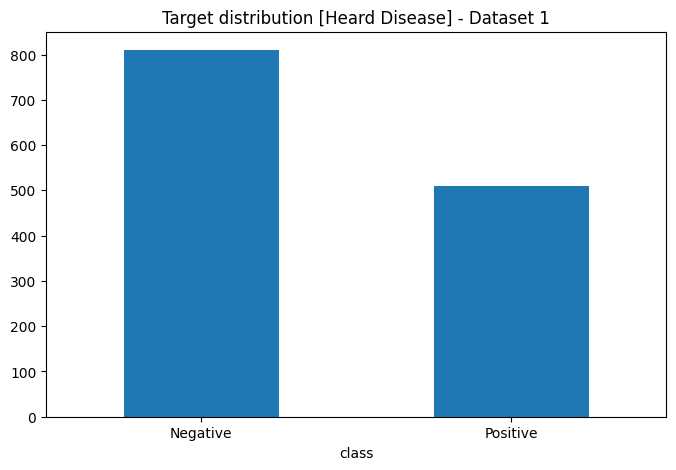

In [613]:
dataset1['class'].value_counts().plot(
    kind='bar', 
    title='Target distribution [Heard Disease] - Dataset 1',
    figsize=(8, 5)
)

plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.show()

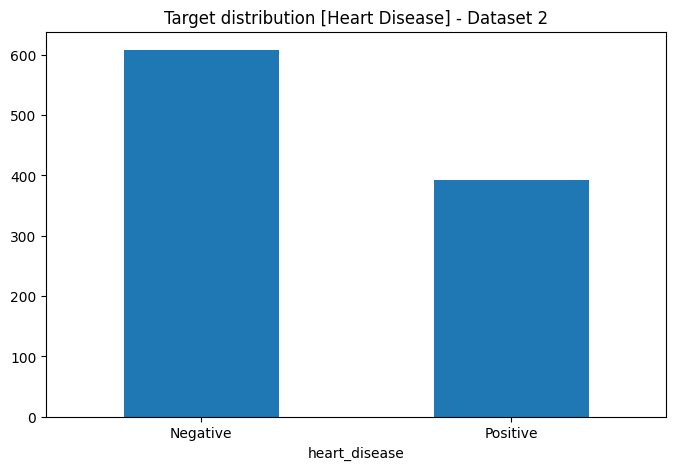

In [614]:
dataset2['heart_disease'].value_counts().plot(
    kind='bar',
    title='Target distribution [Heart Disease] - Dataset 2',
    figsize=(8, 5)
)

plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.show()

#### Correlation matrix - Dataset1, Dataset2

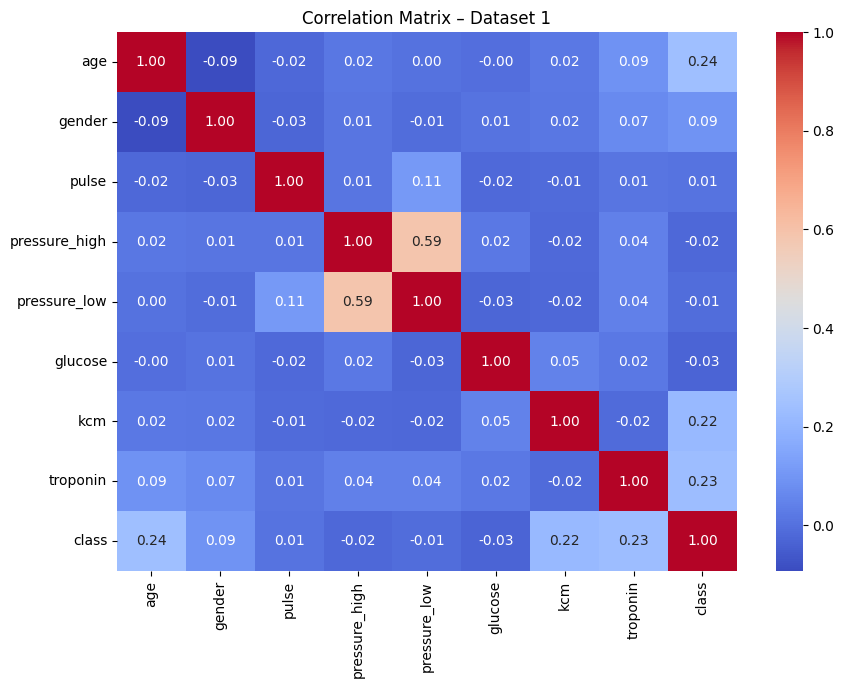

In [597]:
corr_matrix_dataset1 = dataset1.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix_dataset1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix – Dataset 1')
plt.show()

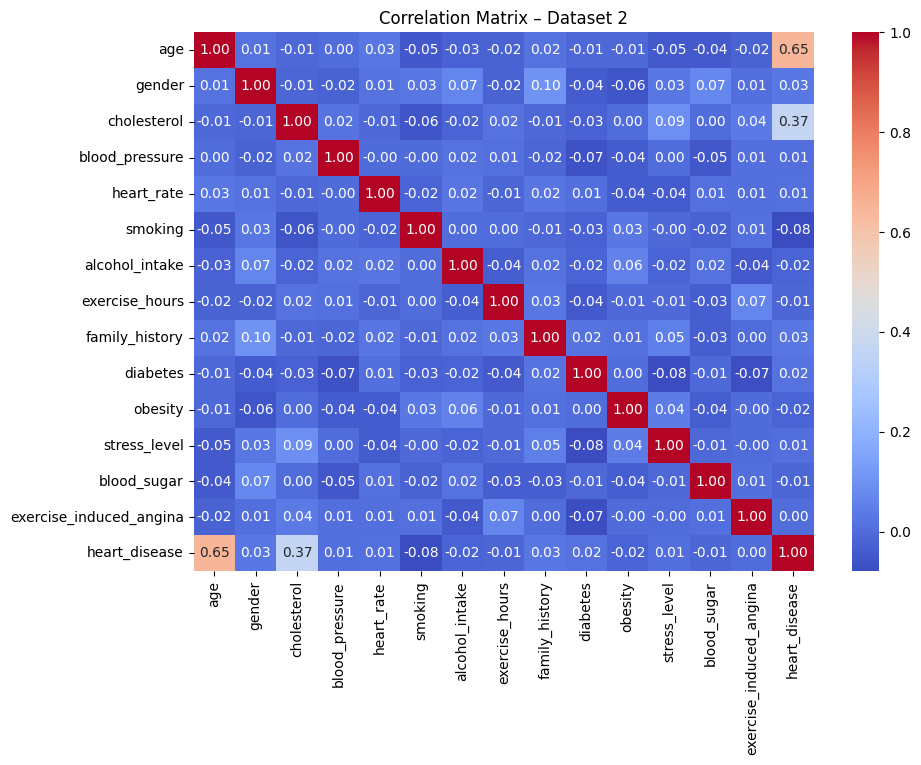

In [598]:
corr_matrix_dataset2 = dataset2.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix_dataset2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix – Dataset 2')
plt.show()

#### Preliminary Outlier Assessment

In [599]:
dataset1

,age,gender,pulse,pressure_high,pressure_low,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


In [600]:
dataset1.describe()

,age,gender,pulse,pressure_high,pressure_low,glucose,kcm,troponin,class
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


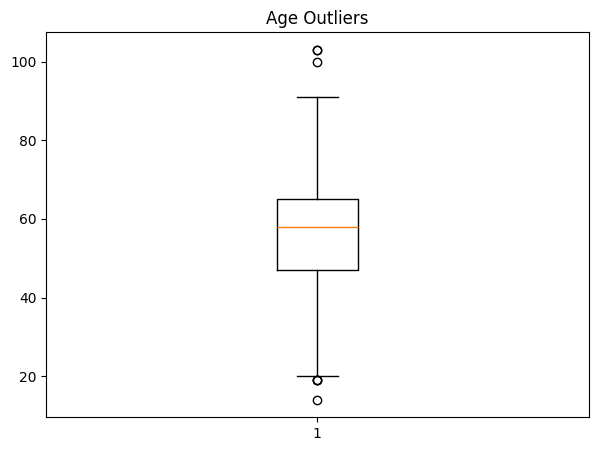

In [601]:
#The boxplot above visualizes the distribution of the `age` feature in Dataset 1
outliers_age = dataset1.age

plt.figure(figsize=(7, 5))
plt.title('Age Outliers')
plt.boxplot(outliers_age)

plt.show()

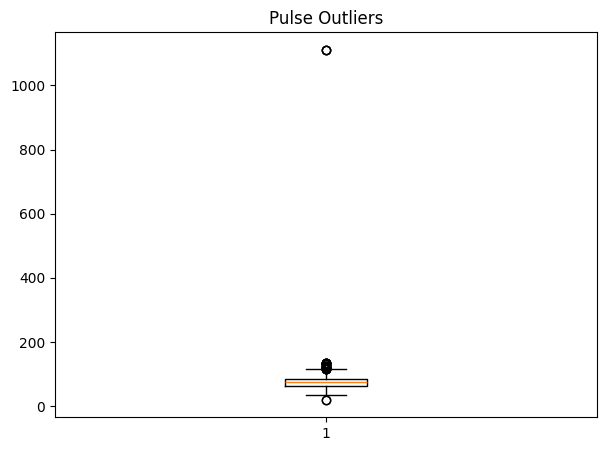

In [602]:
#The boxplot above visualizes the distribution of the `pulse` feature in Dataset 1
outliers_pulse = dataset1.pulse

plt.figure(figsize=(7, 5))
plt.title('Pulse Outliers')
plt.boxplot(outliers_pulse)

plt.show()

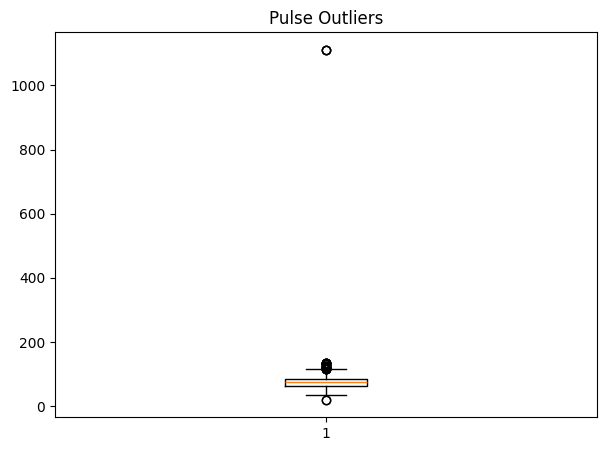

In [603]:
#The boxplot above visualizes the distribution of the `pressurehight` feature in Dataset 1
outliers_pulse = dataset1.pulse

plt.figure(figsize=(7, 5))
plt.title('Pulse Outliers')
plt.boxplot(outliers_pulse)

plt.show()

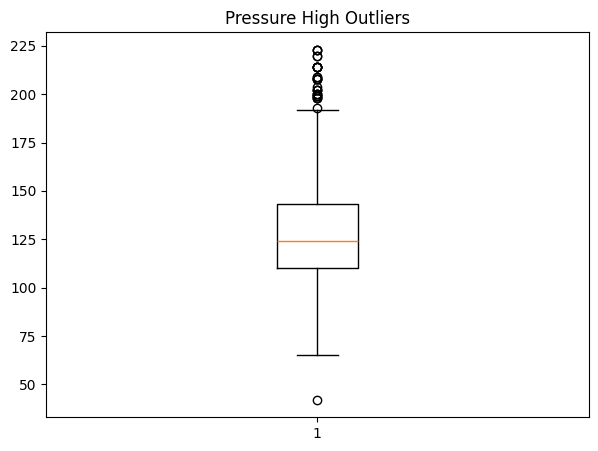

In [604]:
#The boxplot above visualizes the distribution of the `pressure_high` feature in Dataset 1
outliers_pressure_high = dataset1.pressure_high

plt.figure(figsize=(7, 5))
plt.title('Pressure High Outliers')
plt.boxplot(outliers_pressure_high)

plt.show()

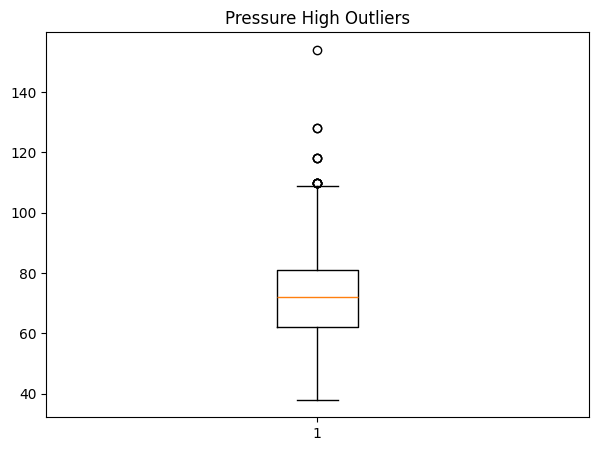

In [605]:
#The boxplot above visualizes the distribution of the `pressure_low` feature in Dataset 1
outliers_pressure_low = dataset1.pressure_low

plt.figure(figsize=(7, 5))
plt.title('Pressure High Outliers')
plt.boxplot(outliers_pressure_low)

plt.show()

In [606]:
dataset2

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,0,228,119,66,1,2,1,0,0,1,8,119,1,atypical angina,1
1,48,1,204,165,62,1,0,5,0,0,0,9,70,1,typical angina,0
2,53,1,234,91,67,0,2,3,1,0,1,5,196,1,atypical angina,1
3,69,0,192,90,72,1,0,4,0,1,0,7,107,1,non-anginal pain,0
4,62,0,172,163,93,0,0,6,0,1,0,2,183,1,asymptomatic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,0,269,111,86,0,2,5,0,1,1,10,120,0,non-anginal pain,1
996,78,0,334,145,76,0,0,6,0,0,0,10,196,1,typical angina,1
997,79,1,151,179,81,0,1,4,1,0,1,8,189,1,asymptomatic,0
998,60,0,326,151,68,2,0,8,1,1,0,5,174,1,atypical angina,1


In [607]:
dataset2.describe()

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,heart_disease
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,0.497000,249.939000,135.2810,79.204000,0.988000,1.006000,4.529000,0.499000,0.505000,0.499000,5.646000,134.941000,0.472000,0.392000
std,15.727126,0.500241,57.914673,26.3883,11.486092,0.815181,0.828644,2.934241,0.500249,0.500225,0.500249,2.831024,36.699624,0.499465,0.488441
min,25.000000,0.000000,150.000000,90.0000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.000000,0.000000,0.000000
25%,39.000000,0.000000,200.000000,112.7500,70.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,104.000000,0.000000,0.000000
50%,52.000000,0.000000,248.000000,136.0000,79.000000,1.000000,1.000000,4.500000,0.000000,1.000000,0.000000,6.000000,135.000000,0.000000,0.000000
75%,66.000000,1.000000,299.000000,159.0000,89.000000,2.000000,2.000000,7.000000,1.000000,1.000000,1.000000,8.000000,167.000000,1.000000,1.000000
max,79.000000,1.000000,349.000000,179.0000,99.000000,2.000000,2.000000,9.000000,1.000000,1.000000,1.000000,10.000000,199.000000,1.000000,1.000000


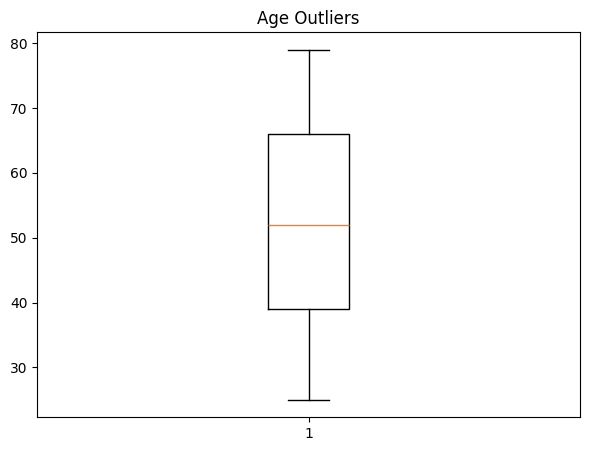

In [608]:
#The boxplot above visualizes the distribution of the `age` feature in Dataset 1
outliers_age = dataset2.age

plt.figure(figsize=(7, 5))
plt.title('Age Outliers')
plt.boxplot(outliers_age)

plt.show()

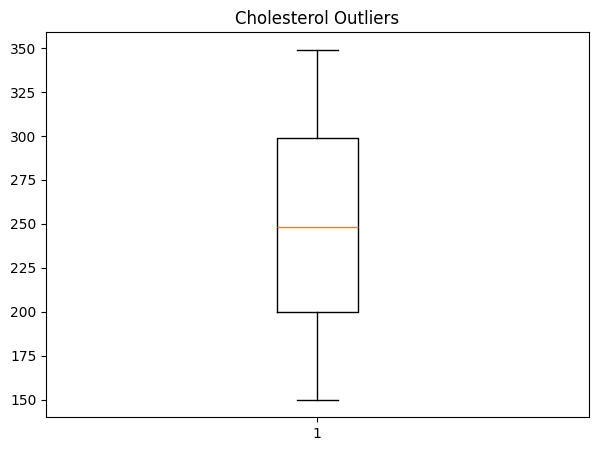

In [609]:
#The boxplot above visualizes the distribution of the `cholesterol` feature in Dataset 1
outliers_cholesterol = dataset2.cholesterol

plt.figure(figsize=(7, 5))
plt.title('Cholesterol Outliers')
plt.boxplot(outliers_cholesterol)

plt.show()

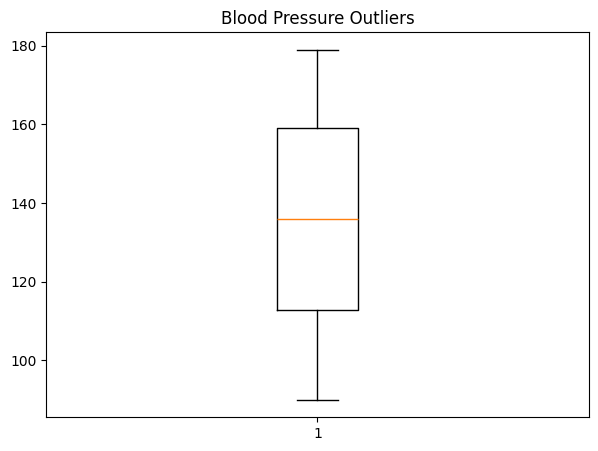

In [610]:
#The boxplot above visualizes the distribution of the `Blood Pressure` feature in Dataset 1
outliers_blood_pressure = dataset2.blood_pressure

plt.figure(figsize=(7, 5))
plt.title('Blood Pressure Outliers')
plt.boxplot(outliers_blood_pressure)

plt.show()

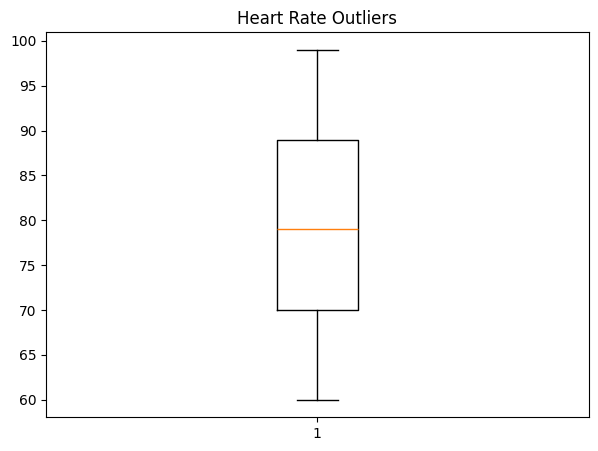

In [611]:
#The boxplot above visualizes the distribution of the `Heart Rate` feature in Dataset 1
outliers_heart_rate = dataset2.heart_rate

plt.figure(figsize=(7, 5))
plt.title('Heart Rate Outliers')
plt.boxplot(outliers_heart_rate)

plt.show()

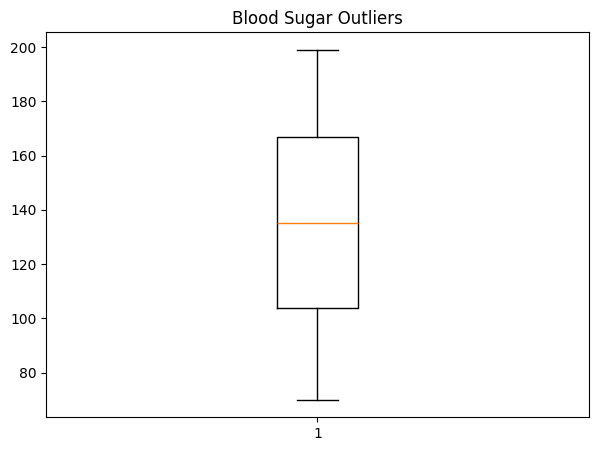

In [612]:
#The boxplot above visualizes the distribution of the `Blood Sugar` feature in Dataset 1
outliers_blood_sugar = dataset2.blood_sugar

plt.figure(figsize=(7, 5))
plt.title('Blood Sugar Outliers')
plt.boxplot(outliers_blood_sugar)

plt.show()

## Key Observations from Initial Data Analysis

From the target distribution, we observe that the number of cases with heart disease is lower than those without in both datasets. This suggests that the data in both cases predominantly represents individuals without significant heart conditions.

The correlation matrix for Dataset 1 shows that the features with the strongest relationship to the target class are `age` (0.24), `kcm` (0.22), and `troponin` (0.23). Although these correlations are not particularly high, they still represent the most relevant predictors for the target variable in this dataset.

In contrast, the correlation matrix for Dataset 2 reveals stronger relationships between certain features and the target class. Notably, the correlation between `age` and the target is 0.65, indicating a strong association. The next most influential feature is `cholesterol` with a correlation coefficient of 0.37, suggesting that higher cholesterol levels are likely linked to an increased probability of heart disease. This finding will be further explored in the next stage of the project, where special attention will be given to cholesterol as a health indicator and the thresholds at which it becomes a significant risk factor. Interestingly, according to the correlation matrix, cholesterol levels do not appear to be strongly dependent on other features — at least based on the current analysis.

Regarding outliers, Dataset 1 contains clearly visible outliers in several numerical variables, which provides additional insights into the data’s variability. In contrast, Dataset 2 shows no notable outliers in the analyzed features.
